# Wrangling Lexis Nexis Syria Text Data
## Exploratory Analysis

This file will explore the cleaned text file, run descriptive statistics, and search for most frequently used words. 

In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('CleanLexisNexis.csv', low_memory=False)

In [3]:
df.dtypes

publication        object
date               object
title              object
length              int64
publicationtype    object
text               object
year                int64
month               int64
day                 int64
dtype: object

## Most common newspapers

In [107]:
news = df[['publication', 'date', 'publicationtype']].sort_values('date')
commonnews = news.groupby('publication').count().sort_values('date', ascending=False)
commonnews.head(5)

,date,publicationtype
publication,,
BBC,2292,2292
The Guardian,729,729
The New York Times,632,632
Us Official News,585,504
The Washington Post,490,490


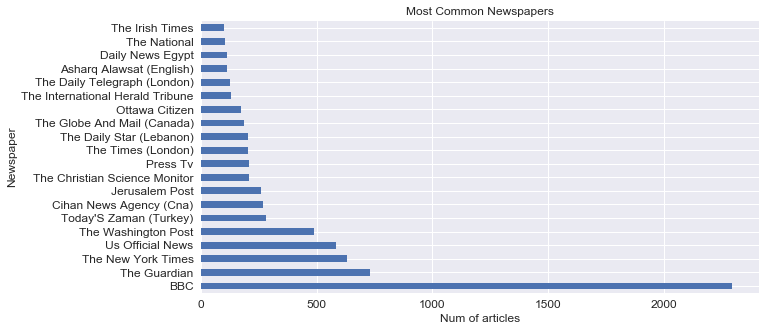

In [97]:
ax = commonnews.date.head(20).plot(kind='barh', title ="Most Common Newspapers", figsize=(10, 5), 
                           legend=False, fontsize=12)
ax.set_xlabel("Num of articles", fontsize=12)
ax.set_ylabel("Newspaper", fontsize=12)

## Most common dates for news events

In [7]:
df.groupby('date').count().sort_values(['text'], ascending=False)

,publication,title,length,publicationtype,text,year,month,day
date,,,,,,,,
2013-09-05,131,131,131,131,131,131,131,131
2013-09-04,110,110,110,110,110,110,110,110
2012-10-23,97,97,97,97,97,97,97,97
2012-10-24,83,83,83,83,83,83,83,83
2013-09-03,66,66,66,66,66,66,66,66
2013-08-31,66,66,66,66,66,66,66,66
2013-09-06,63,63,63,63,63,63,63,63
2013-09-09,58,58,58,58,58,58,58,58
2015-11-20,57,57,57,39,57,57,57,57


In [6]:
df['year'].describe()

count    14846.000000
mean      2013.818604
std          1.613903
min       2010.000000
25%       2013.000000
50%       2014.000000
75%       2015.000000
max       2017.000000
Name: year, dtype: float64

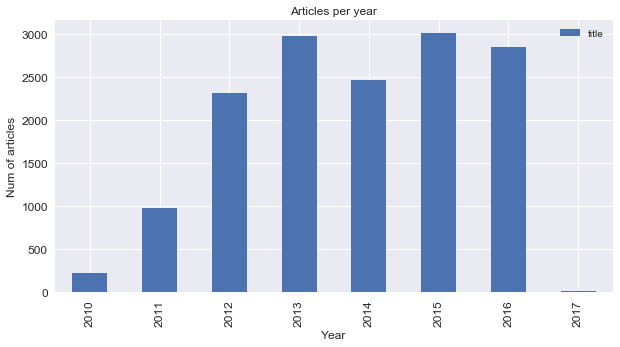

In [56]:
df1 = df.groupby(['year']).count()

ax = df1.title.plot(kind='bar', title ="Articles per year", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Num of articles", fontsize=12)
plt.show()

## Length of newspaper articles

In [25]:
df['length'].describe()

count    14846.000000
mean       858.114037
std        689.237094
min         32.000000
25%        529.000000
50%        737.000000
75%        968.000000
max      14417.000000
Name: length, dtype: float64

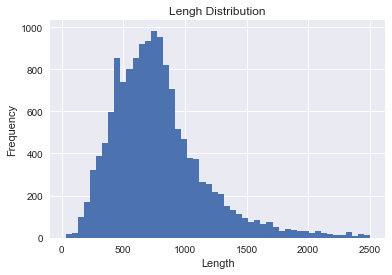

In [14]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.hist(df['length'], bins = 50, range = (df['length'].min(),2500))
# plt.title('Length distribution')
# plt.xlabel('Length')
# plt.ylabel('Count of Words')
# plt.show()
ax  = df['length'].plot(kind='hist', bins = 50, range=(df['length'].min(),2500), 
                  title='Lengh Distribution')
ax = ax.set_xlabel('Length')

## 10 Most Common Words in Title

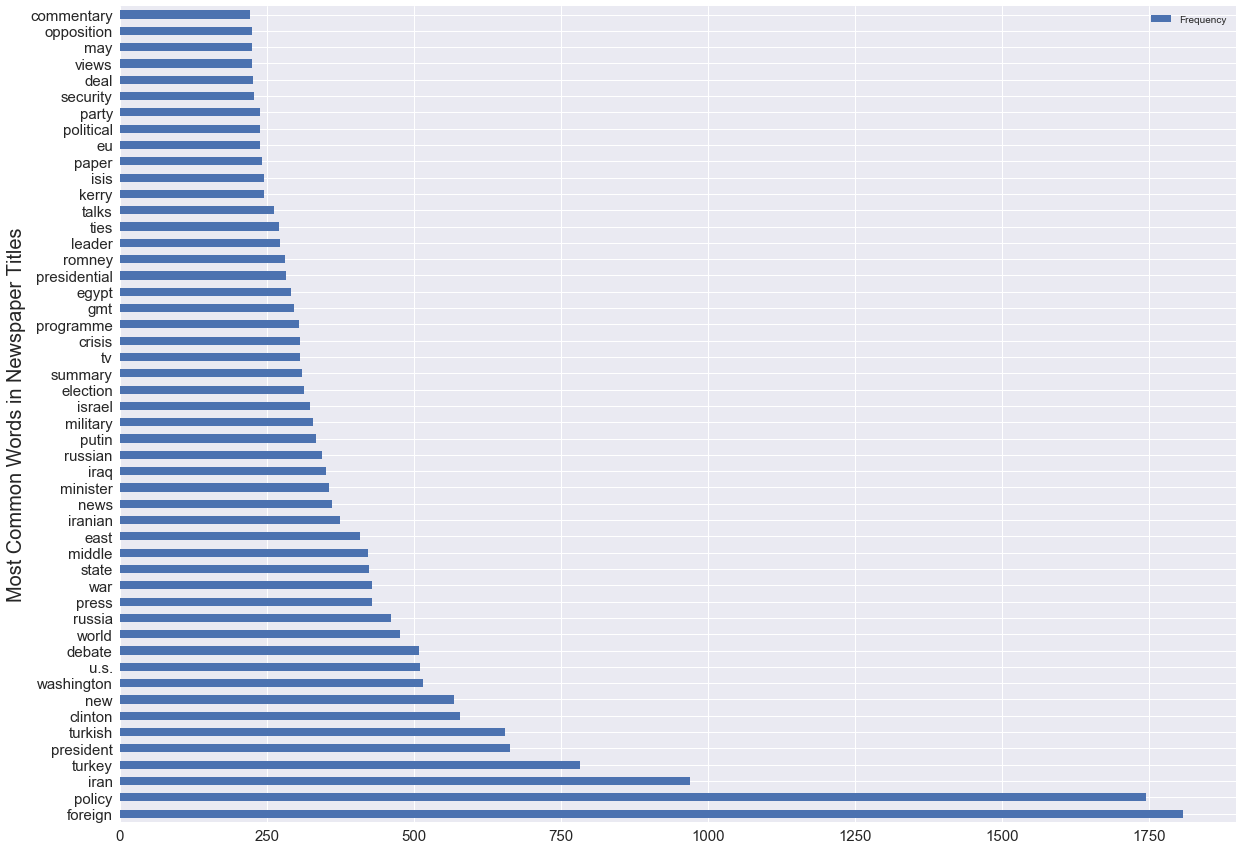

In [6]:
top_N = 50

df2 = pd.read_csv('CleanLexisNexis.csv',
                 usecols=['title'])

txt = df2.title.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
morestopwords = [':', ';', "'s", 'to', 'for', ',', "'", '.', '-', '?', 'says', 
                 'syria', 'obama', 'trump', 'us', "''", '""', "`", '"', "``", "syria", "syrian"
                , "n't"]
for i in morestopwords:
    stopwords.append(i)

words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

# print('All frequencies, including STOPWORDS:')
# print('=' * 60)
# rslt = pd.DataFrame(word_dist.most_common(top_N),
#                     columns=['Word', 'Frequency'])
# print(rslt)
# print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('seaborn')

my_plot = rslt.plot(kind='barh', figsize=(20, 15))
my_plot.set_ylabel("Most Common Words in Newspaper Titles", size=20)
my_plot.tick_params(axis='both', which='major', labelsize=15)

## 10 Most Common Words in Text

All frequencies, including STOPWORDS:
    Word  Frequency
0    the     861021
1      ,     646661
2      .     526140
3     to     379194
4     of     375387
5    and     340303
6     in     310296
7      a     266717
8   that     180842
9     is     152285
10    's     147660
11    ''     122320
12    on     119190
13   for     117954
14    ``     116453
15  with      97586
16    it      92261
17    as      88014
18    he      84333
19   has      78685


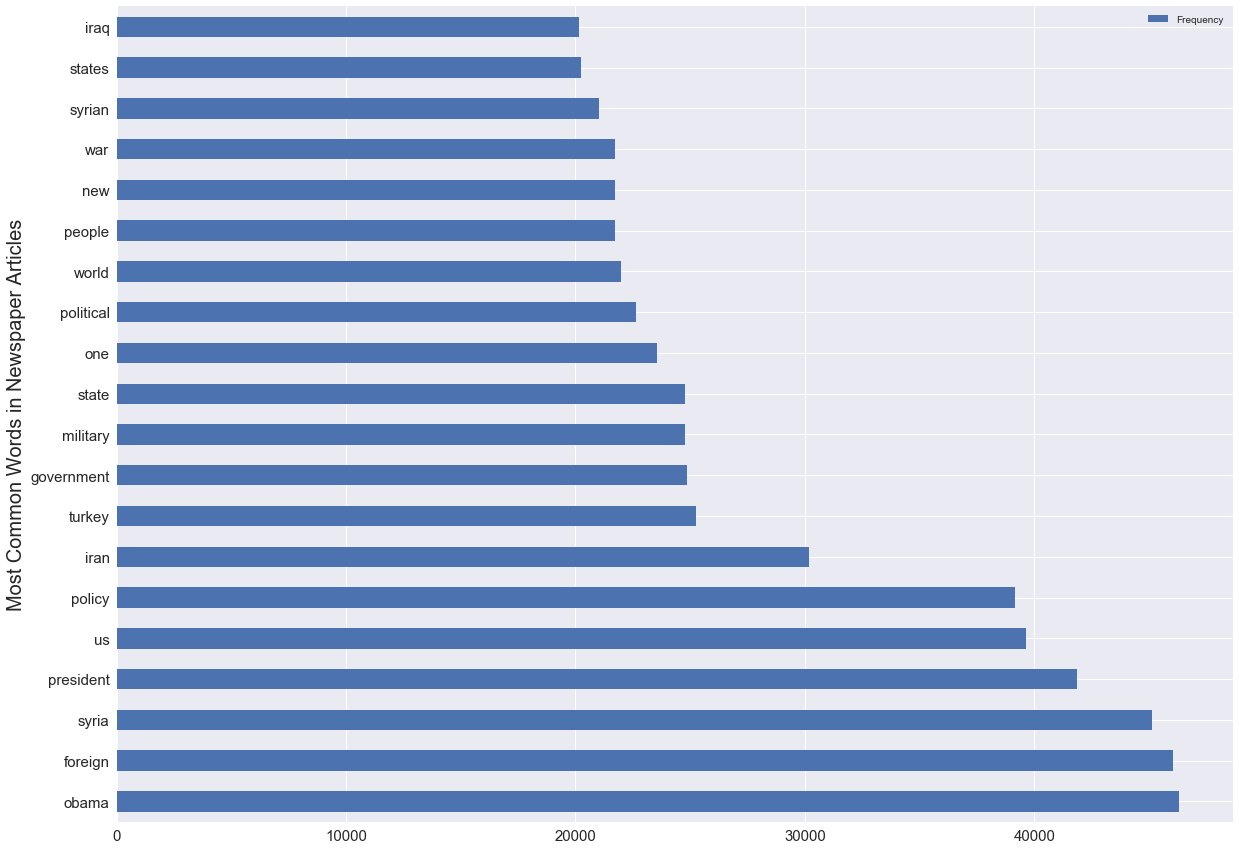

In [3]:
top_N = 20

df3 = pd.read_csv('CleanLexisNexis.csv',
                 usecols=['text'])

txt = df3.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
morestopwords = [':', ';', "'s", 'to', 'for', ',', "'", '.', '-', '?', 'says', '"', "`", "``",
                "''", "(", ")", "said", "would", "also", "n't", "syria", "syrian"]
for i in morestopwords:
    stopwords.append(i)

words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('seaborn')

my_plot = rslt.plot(kind='barh', figsize=(20, 15))
my_plot.set_ylabel("Most Common Words in Newspaper Articles", size=20)
my_plot.tick_params(axis='both', which='major', labelsize=15)